In [7]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_dir = os.path.join(os.getcwd(), '..', 'data', 'cric_cropped', 'Base balanceada dividida', '6 classes')
folders = ['Teste', 'Treino', 'Validacao']

# Getting Pixel Values

In [12]:
pixel_dfs = []
for folder in folders:
    for path in os.listdir(os.path.join(image_dir, folder)):
        if os.path.isfile(os.path.join(image_dir, folder, path)):
            img = Image.open(os.path.join(image_dir, folder, path))
            img_array = np.array(img)
            img_array = img_array.reshape(img_array.shape[0] * img_array.shape[1], img_array.shape[2])
            pixel_dfs.append(pd.DataFrame(img_array))
            print('Done with', path)

pixel_df = pd.concat(pixel_dfs)
pixel_df.shape

Done with 0_0_.png
Done with 100_0_.png
Done with 101_0_.png
Done with 102_0_.png
Done with 103_0_.png
Done with 104_0_.png
Done with 105_0_.png
Done with 106_0_.png
Done with 107_0_.png
Done with 108_1_.png
Done with 109_1_.png
Done with 10_0_.png
Done with 110_1_.png
Done with 111_1_.png
Done with 112_1_.png
Done with 113_1_.png
Done with 114_1_.png
Done with 115_1_.png
Done with 116_1_.png
Done with 117_1_.png
Done with 118_1_.png
Done with 119_1_.png
Done with 11_0_.png
Done with 120_1_.png
Done with 121_1_.png
Done with 122_1_.png
Done with 123_1_.png
Done with 124_1_.png
Done with 125_1_.png
Done with 126_1_.png
Done with 127_1_.png
Done with 128_1_.png
Done with 129_1_.png
Done with 12_0_.png
Done with 130_1_.png
Done with 131_1_.png
Done with 132_1_.png
Done with 133_1_.png
Done with 134_1_.png
Done with 135_1_.png
Done with 136_1_.png
Done with 137_1_.png
Done with 138_1_.png
Done with 139_1_.png
Done with 13_0_.png
Done with 140_1_.png
Done with 141_1_.png
Done with 142_1_.pn

(38790900, 3)

In [13]:
pixel_df.head()

,0,1,2
0,210,214,199
1,208,213,197
2,211,216,198
3,211,214,202
4,209,210,202


# Clustering

In [16]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Done with 2 clusters
Done with 3 clusters
Done with 4 clusters
Done with 5 clusters
Done with 6 clusters
Done with 7 clusters
Done with 8 clusters
Done with 9 clusters
Done with 10 clusters


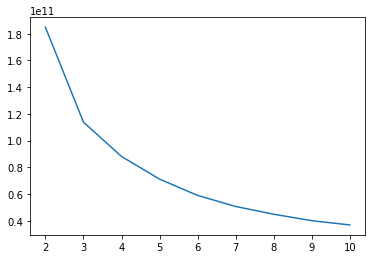

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n = 10
vals = {'clusters': [], 'inertia': []}
for i in range(2, n+1):
    cluster_df = pixel_df.copy()
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(pixel_df)
    vals['inertia'].append(model.inertia_)
    vals['clusters'].append(i)
    print("Done with {} clusters".format(i))

vals = pd.DataFrame(vals)

plt.figure()
plt.plot(vals['clusters'], vals['inertia'])
plt.show()

In [38]:
cluster_df = pixel_df.copy()
model = KMeans(n_clusters=3, random_state=42)
model.fit(pixel_df)
cluster_df['Cluster'] = model.predict(pixel_df)
cluster_df.head()

,0,1,2,Cluster
0,210,214,199,2
1,208,213,197,2
2,211,216,198,2
3,211,214,202,2
4,209,210,202,2


In [61]:
colors = cluster_df.groupby('Cluster').mean().round()
colors 

,0,1,2
Cluster,,,
0,117.0,117.0,150.0
1,61.0,45.0,59.0
2,199.0,199.0,210.0


In [77]:
color_map = {
    0: [117, 117, 150],
    1: [61, 45, 59],
    2: [199, 199, 210]
}

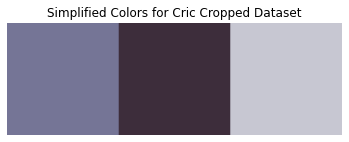

In [63]:
array = np.zeros([100, len(colors) * 100, 3], dtype=np.uint8)

for cluster, rgb in colors.iterrows():
    array[:, (cluster-1)*100 + 100 : (cluster*100) + 200] = rgb.values

plt.figure()
plt.imshow(array)

plt.axis('off')
plt.title("Simplified Colors for Cric Cropped Dataset")
plt.savefig('cric_cropped_simplified_colors.jpg', transparent=False)
plt.show()

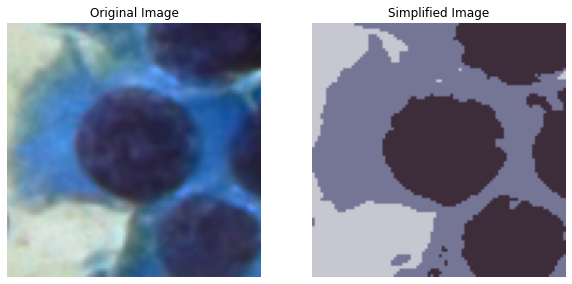

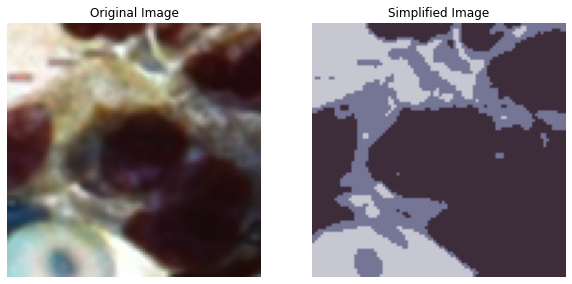

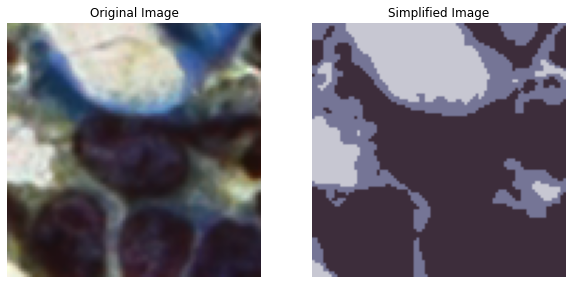

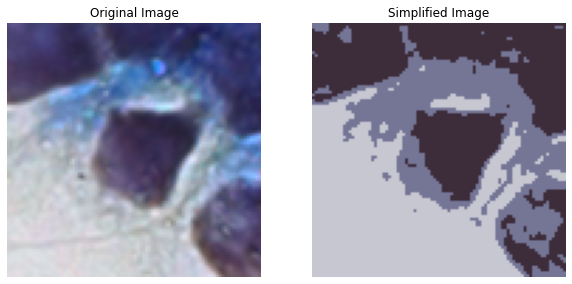

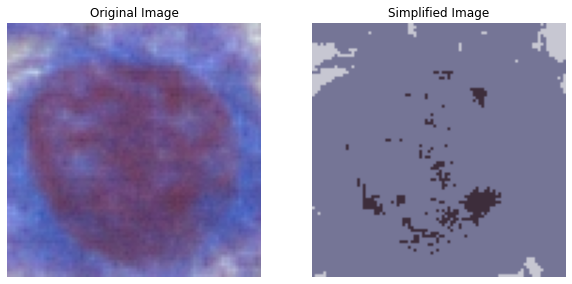

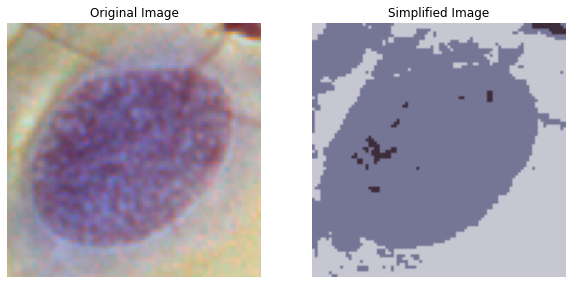

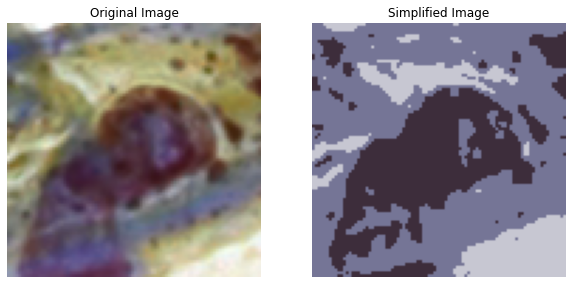

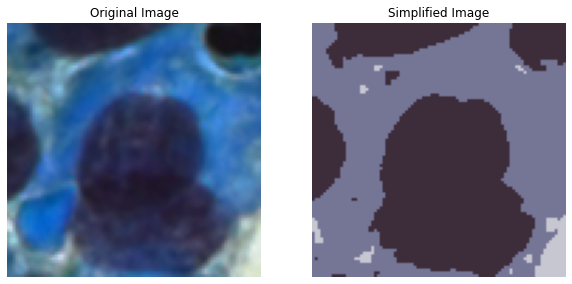

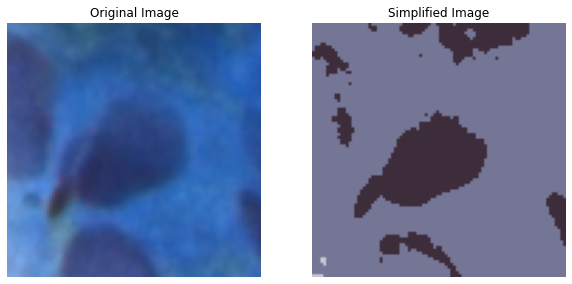

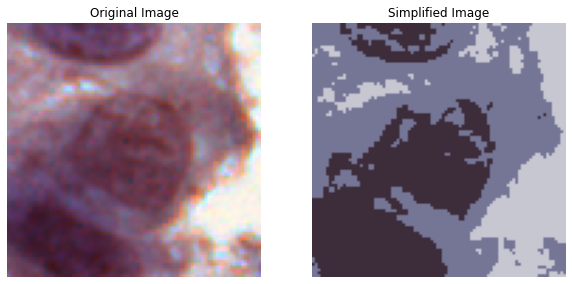

In [96]:

for images in ['0_0_.png', '1_0_.png', '2_0_.png', '3_0_.png', '4_0_.png', '5_0_.png', '6_0_.png', '7_0_.png', '8_0_.png', '9_0_.png']:
    img = Image.open(os.path.join(image_dir, 'Teste', images))
    img_array = np.array(img)
    img_array = img_array.reshape(img_array.shape[0] * img_array.shape[1], img_array.shape[2])
    processed_img = model.predict(img_array).tolist()
    processed_img = np.array(list(map(lambda x: color_map[x], processed_img))).reshape(img.width, img.height, 3)
    img_array = np.array(img)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(img_array)
    ax[0].axis('off')
    ax[0].set_title('Original Image')

    ax[1].imshow(processed_img)
    ax[1].axis('off')
    ax[1].set_title("Simplified Image")

    plt.savefig(f'cric_cropped_simplification_sample{images}.jpg', transparent=False)

    plt.show()